# <p style="text-align:center; color:Purple; font-size:1.5em"> Iris Flower Classification </p>
<img src="./iris.png" alt="Alternative text" width="750" style="border:1.5px solid black">


### Importing Necessary Libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Loading Dataset from csv file

In [68]:
df = pd.read_csv("Iris.csv")
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa


### Exploratory Data Analysis (EDA)

In [69]:
df.drop(columns='Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.shape

(150, 5)

In [71]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [72]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


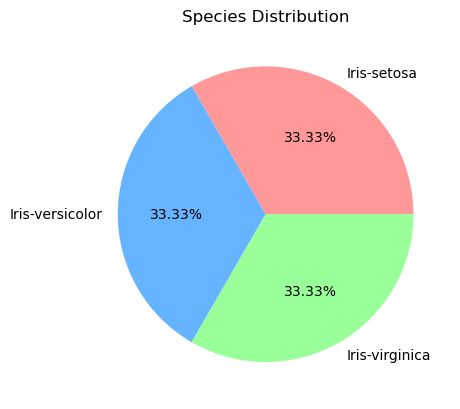

In [75]:
# Calculate the value counts for the "Species" column
species_counts = df["Species"].value_counts()

# Create the pie chart
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(species_counts, labels=species_counts.index, autopct='%.2f%%', colors=colors)
plt.title("Species Distribution")
plt.show()

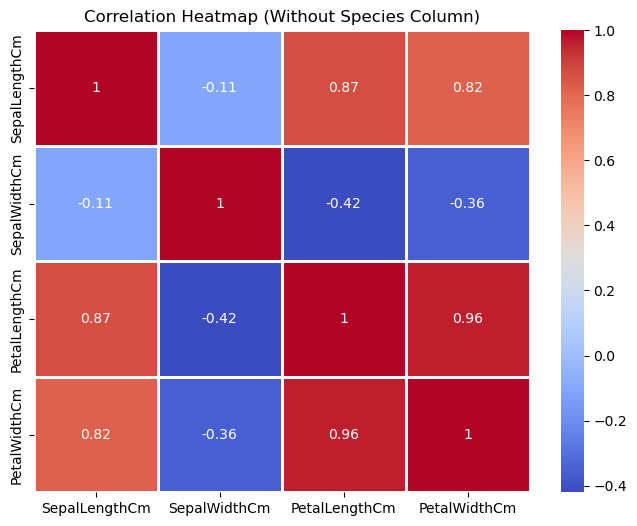

In [76]:
# Drop the 'species' column explicitly to avoid non-numeric data errors
df_numeric = df.drop(columns=['Species'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), linecolor='white', linewidths=1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Without Species Column)")
plt.show()

Text(0.5, 0.98, 'Boxplot For Each Features')

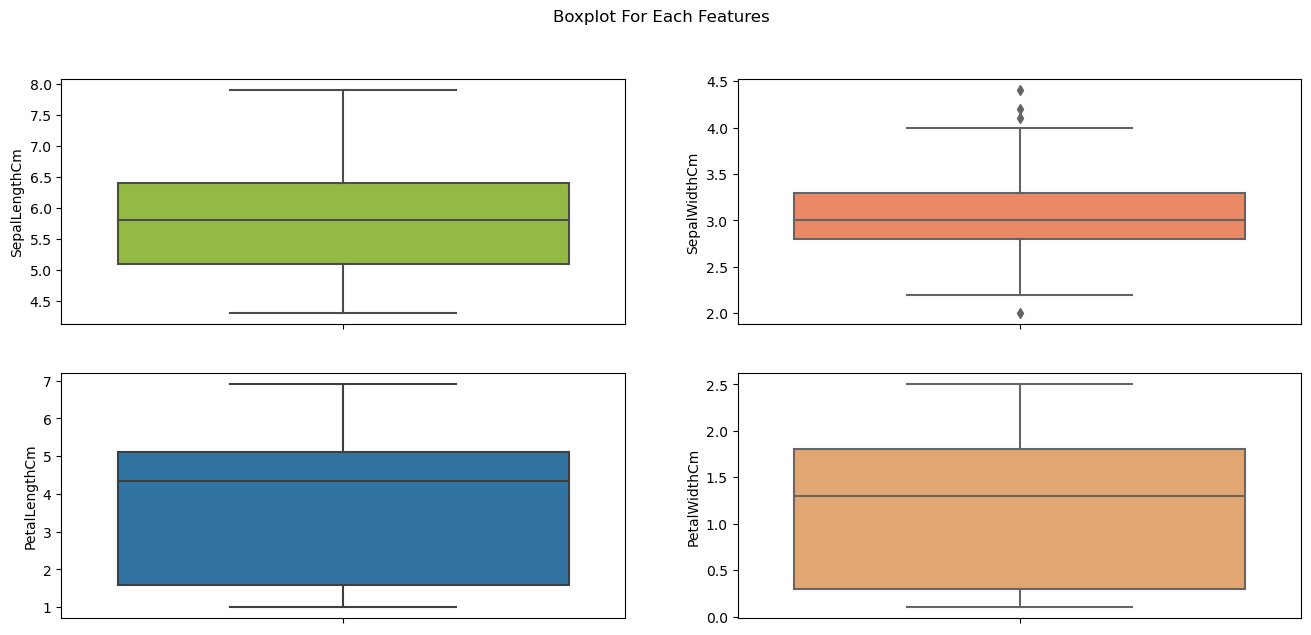

In [77]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 7))

sns.boxplot(y='SepalLengthCm', data=df, ax=axes[0,0], color='yellowgreen')
sns.boxplot(y='SepalWidthCm', data=df, ax=axes[0,1], color='coral')
sns.boxplot(y='PetalLengthCm', data=df, ax=axes[1,0])
sns.boxplot(y='PetalWidthCm', data=df, ax=axes[1,1], color='sandybrown')

fig.suptitle('Boxplot For Each Features')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

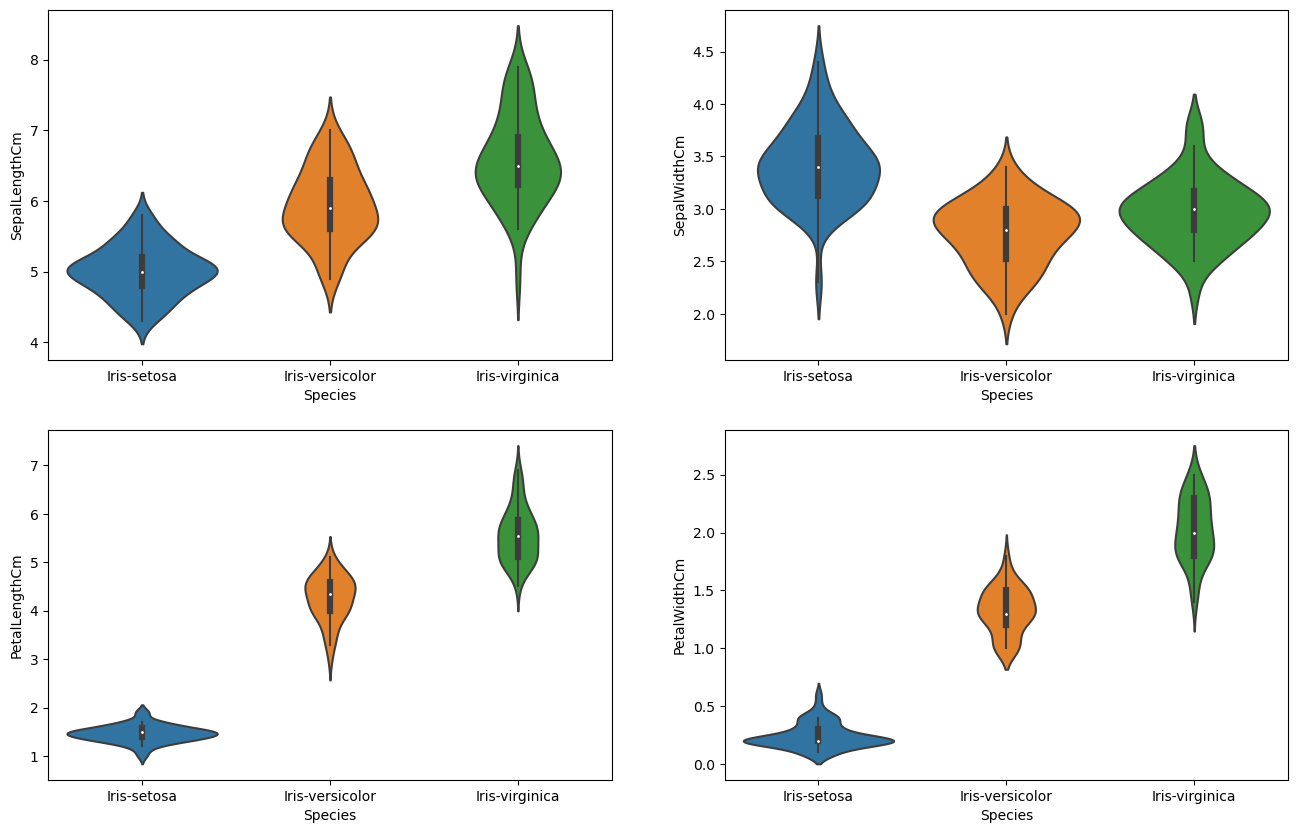

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0,0])
sns.violinplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0,1])
sns.violinplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1,0])
sns.violinplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1,1])

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


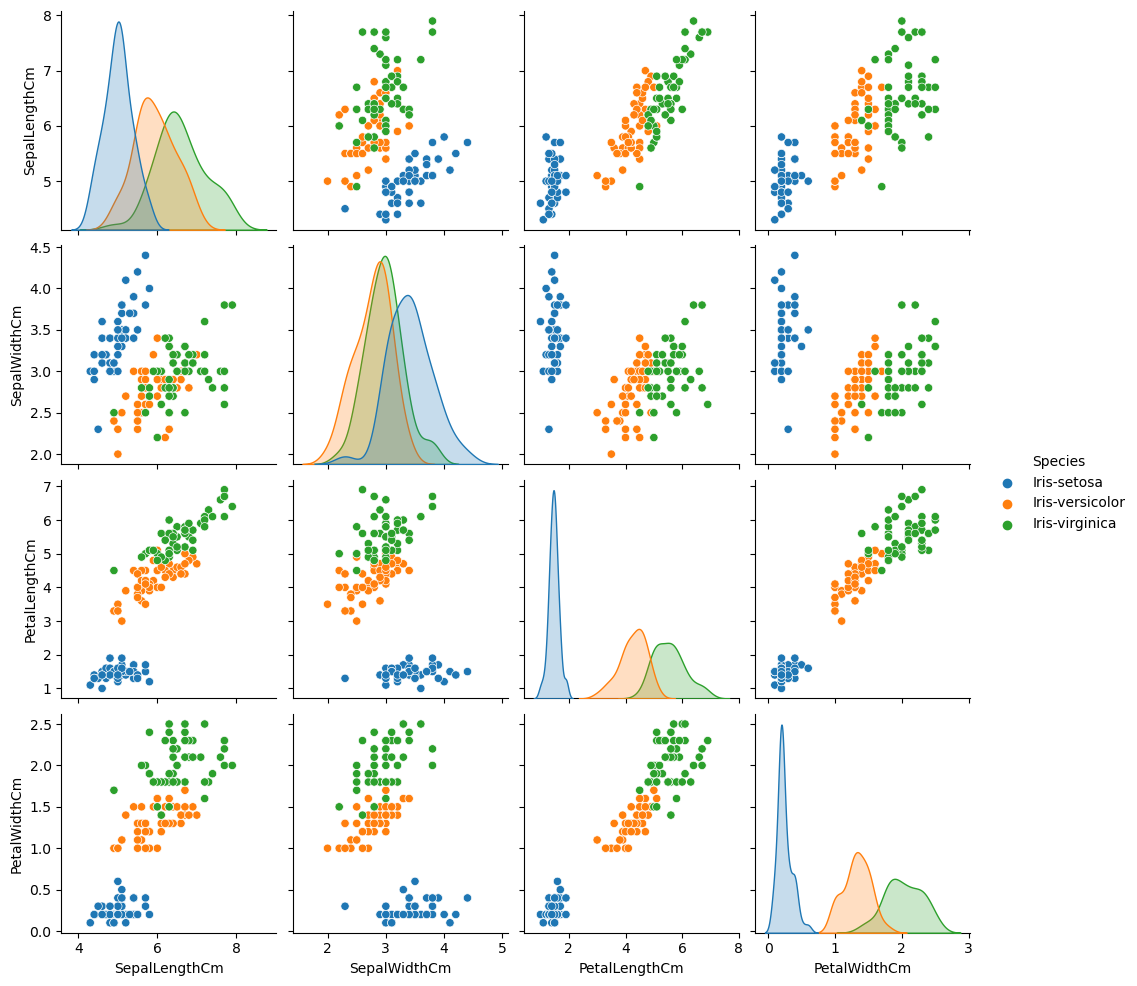

In [79]:
sns.pairplot(df,hue="Species")

#### Importing ML Libraries

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

#### Encoding target column

In [81]:
lbl = LabelEncoder()
df['Species'] = lbl.fit_transform(df['Species'])

#### Dividing data into dependent and independent features

In [82]:
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values

#### Dividing data into training and testing set

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# Logistic Regression

In [85]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = reg.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [87]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [88]:
# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)

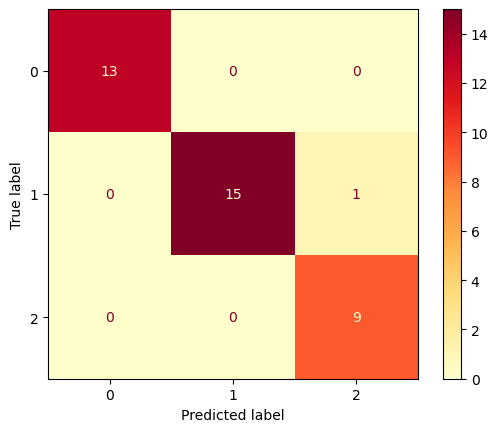

In [89]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_ )

cm_disp.plot(cmap="YlOrRd")

In [90]:
# Checking accuracy
acc = round(accuracy_score(y_test, y_pred), 5)
print(acc * 100, "%")

97.368 %


In [91]:
# check precision,recall,f1-score using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [92]:
d = np.array([[5.2,3,0.8,0.6], [7.5,5.6,4,3.5]])
prediction = reg.predict(d)
prediction

array([0, 2])